In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data 
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data
analyticsDeneme.csv	      productPerformanceReportEng.csv  youtube.csv
fifa.csv		      states_all.csv
productPerformanceReport.csv  StudentsPerformance.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [84]:
original_data = pd.read_csv("productPerformanceReportEng.csv", sep=";")
original_data.head()

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Unnamed: 12
0,20200101,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,nan
1,20200101,Wednesday,Bebek,GIyIm,ESofman TakImI,adIdas I Bball Jog Ft,18,1,10,1,1,173.00,nan
2,20200101,Wednesday,Cocuk,Aksesuar,SIrt CantasI,NIke Y Nk Brsla JdI MInI Bkpk,58,3,15,1,1,91.90,nan
3,20200101,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,nan
4,20200101,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,nan


In [85]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356 entries, 0 to 13355
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    13356 non-null  int64  
 1   Day of Week Name        13356 non-null  object 
 2   MaIn Category           13356 non-null  object 
 3   Sub Category            13325 non-null  object 
 4   Category                13299 non-null  object 
 5   Product                 13356 non-null  object 
 6   Product DetaIl VIews    13356 non-null  object 
 7   Product Adds To Basket  13356 non-null  int64  
 8   Product Checkouts       13356 non-null  int64  
 9   UnIque Purchases        13356 non-null  int64  
 10  QuantIty                13356 non-null  int64  
 11  Product Revenue         13356 non-null  object 
 12  Unnamed: 12             0 non-null      float64
dtypes: float64(1), int64(5), object(7)
memory usage: 1.3+ MB


In [0]:
data=original_data.copy()

In [0]:
data['Date']=pd.to_datetime(data['Date'], format='%Y%m%d', errors='ignore')

In [0]:
data["Month"] = data["Date"].apply(lambda x: datetime.strftime(x, "%m"))  # Datetime -> month
data['Month'] = data['Month'].str.replace(r'\D', '').astype(int)  #Month u da int'e çevirdim

In [0]:
data2=original_data.copy()

In [90]:
data.describe()

,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Unnamed: 12,Month
count,13356.00,13356.00,13356.00,13356.00,0.00,13356.00
mean,4.00,21.23,1.36,1.40,nan,2.21
std,5.69,29.56,1.07,1.37,nan,0.80
min,0.00,0.00,1.00,1.00,nan,1.00
25%,1.00,6.00,1.00,1.00,nan,2.00
50%,2.00,12.00,1.00,1.00,nan,2.00
75%,5.00,25.00,1.00,1.00,nan,3.00
max,94.00,525.00,31.00,60.00,nan,3.00


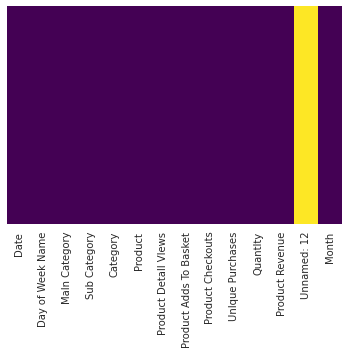

In [91]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Sarı olanlar null
plt.show()

In [92]:
data.drop(['Unnamed: 12'], axis=1)

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month
0,2020-01-01,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,1
1,2020-01-01,Wednesday,Bebek,GIyIm,ESofman TakImI,adIdas I Bball Jog Ft,18,1,10,1,1,173.00,1
2,2020-01-01,Wednesday,Cocuk,Aksesuar,SIrt CantasI,NIke Y Nk Brsla JdI MInI Bkpk,58,3,15,1,1,91.90,1
3,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,1
4,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade,62,2,6,1,1,70.90,3
13352,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade-Fa19,40,3,7,2,2,169.80,3
13353,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Skls,256,1,3,1,1,56.90,3
13354,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,PIlates,(not set),298,6,20,1,1,25.00,3


In [0]:
data=data.drop(['Unnamed: 12'], axis=1)

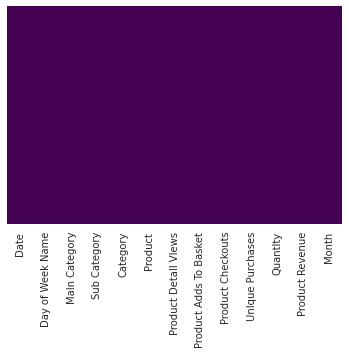

In [94]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') # Fazlalık olan kolonu başarılı bir şekilde sildiğimizin görselleştirilmesi
plt.show()

In [95]:
data['Product DetaIl VIews'].describe() # Object olduğu için hesaplama yapamıyorum, float'a çevirmek için sadece Digitleri tutan fonksiyon kullandım

count     13356
unique     1337
top           3
freq        193
Name: Product DetaIl VIews, dtype: object

In [96]:
#data['Product DetaIl VIews'].replace(',','')
#data['Product DetaIl VIews'].astype(str).astype(int)
data['Product DetaIl VIews'] = data['Product DetaIl VIews'].str.replace(r'\D', '').astype(int)
data['Product DetaIl VIews'].describe()

count   13356.00
mean      219.36
std       363.21
min         0.00
25%        34.00
50%        95.00
75%       249.00
max      6367.00
Name: Product DetaIl VIews, dtype: float64

In [97]:
data['Product DetaIl VIews']

0         15
1         18
2         58
3          5
4         48
        ... 
13351     62
13352     40
13353    256
13354    298
13355     34
Name: Product DetaIl VIews, Length: 13356, dtype: int64

In [98]:
data['Product Revenue'] = data['Product Revenue'].str.replace(r'\D', '').astype(int) # Revenuede de aynısını denedim ama çıkan sonuçlar hoşuma gitmedi
pd.options.display.float_format='{:.2f}'.format # e leri atmak düzgün göstermek için yaptık
data['Product Revenue']=data['Product Revenue']/100
data['Product Revenue'].describe()

count   13356.00
mean      353.68
std       426.32
min         7.50
25%       154.90
50%       246.75
75%       419.25
max     13995.00
Name: Product Revenue, dtype: float64

In [0]:
def pd_kategorize_et(adet):
    if adet >= 219:
        return 1
    elif adet >= 34:
        return 2
    else:
        return 3

In [100]:
data['productDetail_grup'] = data['Product DetaIl VIews'].apply(pd_kategorize_et)
display(data)

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,2020-01-01,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,1,3
1,2020-01-01,Wednesday,Bebek,GIyIm,ESofman TakImI,adIdas I Bball Jog Ft,18,1,10,1,1,173.00,1,3
2,2020-01-01,Wednesday,Cocuk,Aksesuar,SIrt CantasI,NIke Y Nk Brsla JdI MInI Bkpk,58,3,15,1,1,91.90,1,2
3,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,1,3
4,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade,62,2,6,1,1,70.90,3,2
13352,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade-Fa19,40,3,7,2,2,169.80,3,2
13353,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Skls,256,1,3,1,1,56.90,3,1
13354,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,PIlates,(not set),298,6,20,1,1,25.00,3,1


In [101]:
#data.groupby('Category').count()
data.loc[:, 'Category'].unique()

array(['Spor AyakkabI', 'ESofman TakImI', 'SIrt CantasI', 'Ceket',
       'ESofman AltI', 'Mont', 'Sort Ve KaprI', 'SweatshIrt', 'T-ShIrt',
       'Futbol Topu', 'Spor CantasI', 'TerlIk', 'Tayt', 'Corap', 'Bone',
       'YUzme GozlUgU', 'Bot Ve CIzme', 'BUstIyer', 'Pantolon',
       'AtkI, Bere Ve EldIven', 'BagcIk', 'Basketbol Topu', 'Forma',
       'Canta', 'KalecI EldIvenI', 'Basketbol Sortu', 'CUzdan', 'Sapka',
       'Mayo', 'Sandalet', 'Havuz Ve DenIz AyakkabIsI',
       'Yagmurluk-RUzgarlIk', 'Gomlek', 'DIzlIkler', nan,
       'AgIrlIk EldIvenI', 'ElbIse - Etek', 'Suluk', 'İçlIk-Pro',
       'Saç BandI', 'Yelek', 'TekmelIk', 'PIlates', 'Kemer', 'Pompa',
       'AyakkabI BakIm ÜrUnlerI', 'Babet', 'TenIs RaketI', 'GozlUk',
       'Voleybol Topu', 'El Ve Ayak BIleklIklerI', 'GIyIm', 'Atlama İpI',
       'KoSu BandI'], dtype=object)

In [102]:
data.loc[:, 'Category'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head(10) #En çok yer alan kategori Spor Ayakkabı

Spor AyakkabI    7650
ESofman AltI      735
T-ShIrt           699
Mont              458
SIrt CantasI      414
Ceket             368
Tayt              331
Corap             285
SweatshIrt        239
TerlIk            220
Name: Category, dtype: int64

In [103]:
data.loc[:, 'Product'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True).head(10) #En çok yer alan ürün AdIdas Runfalcon

adIdas Runfalcon            105
adIdas Hoops 2.0             89
adIdas ArchIvo               84
YalI Spor Soket Corap        74
NIke Star Runner 2 (Psv)     68
(not set)                    62
NIke PIco 5 (Psv)            61
Vans Ua Era                  61
adIdas Crazychaos            59
NIke PIco 5 (Tdv)            58
Name: Product, dtype: int64

In [104]:
SporAyakkabi=data[data.Category=='Spor AyakkabI']
SporAyakkabi

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,2020-01-01,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,1,3
3,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,1,3
4,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,1,2
5,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Tf,38,1,5,1,1,168.90,1,2
6,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke NIke RevolutIon 4 (Psv),17,2,5,1,1,161.90,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13342,2020-03-31,Tuesday,UnIsex,AyakkabI,Spor AyakkabI,Vans Sk8-HI,608,7,40,1,1,391.30,3,1
13343,2020-03-31,Tuesday,UnIsex,AyakkabI,Spor AyakkabI,Vans Ua Comfycush Old Skool,1054,4,14,1,1,391.30,3,1
13344,2020-03-31,Tuesday,UnIsex,AyakkabI,Spor AyakkabI,Vans Ua Era,1167,10,42,1,1,229.00,3,1
13345,2020-03-31,Tuesday,UnIsex,AyakkabI,Spor AyakkabI,Vans Ua Old Skool,1582,14,66,5,5,1872.50,3,1


In [105]:
SporAyakkabi.loc[:, 'MaIn Category'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Erkek     2638
Cocuk     1787
KadIn     1652
Bebek      895
UnIsex     678
Name: MaIn Category, dtype: int64

In [106]:
dfDMC=data.groupby('MaIn Category').mean().reset_index()
dfDMC

,MaIn Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,Bebek,370.90,7.19,32.57,1.65,1.67,265.18,2.38,1.73
1,Cocuk,221.31,4.95,26.20,1.48,1.51,276.60,2.22,1.95
2,Erkek,184.39,3.14,18.15,1.29,1.33,422.91,2.22,2.00
3,KadIn,202.11,3.33,18.06,1.22,1.23,394.36,2.15,2.00
4,UnIsex,256.11,4.21,21.09,1.43,1.56,264.35,2.16,1.95


In [107]:
dfSMC=SporAyakkabi.groupby('MaIn Category').mean().reset_index()
dfSMC

,MaIn Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,Bebek,398.61,7.66,34.24,1.71,1.73,272.04,2.39,1.67
1,Cocuk,290.36,6.19,30.67,1.64,1.65,342.55,2.27,1.72
2,Erkek,260.27,3.87,21.07,1.39,1.40,479.93,2.29,1.74
3,KadIn,290.82,3.95,19.86,1.30,1.31,431.60,2.27,1.75
4,UnIsex,502.15,5.12,26.83,1.54,1.55,496.40,2.24,1.49


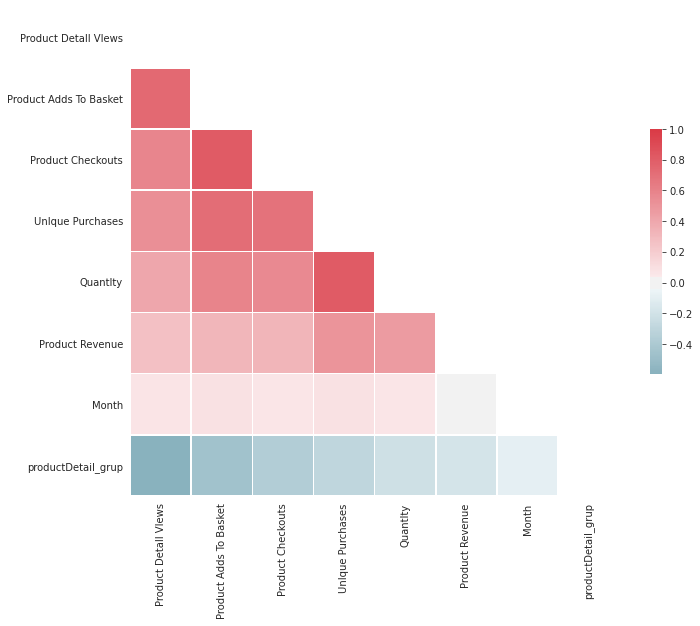

In [108]:
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

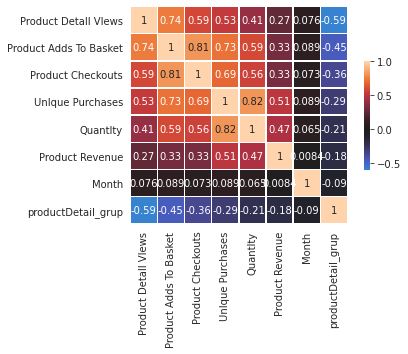

In [109]:
ax = sns.heatmap(data.corr(),vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [110]:
data.corr() #Burayı çizdirebilirim :D

,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
Product DetaIl VIews,1.00,0.74,0.59,0.53,0.41,0.27,0.08,-0.59
Product Adds To Basket,0.74,1.00,0.81,0.73,0.59,0.33,0.09,-0.45
Product Checkouts,0.59,0.81,1.00,0.69,0.56,0.33,0.07,-0.36
UnIque Purchases,0.53,0.73,0.69,1.00,0.82,0.51,0.09,-0.29
QuantIty,0.41,0.59,0.56,0.82,1.00,0.47,0.06,-0.21
Product Revenue,0.27,0.33,0.33,0.51,0.47,1.00,0.01,-0.18
Month,0.08,0.09,0.07,0.09,0.06,0.01,1.00,-0.09
productDetail_grup,-0.59,-0.45,-0.36,-0.29,-0.21,-0.18,-0.09,1.00


In [111]:
SporAyakkabi.corr()

,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
Product DetaIl VIews,1.00,0.75,0.62,0.55,0.54,0.34,0.08,-0.57
Product Adds To Basket,0.75,1.00,0.84,0.75,0.74,0.46,0.12,-0.42
Product Checkouts,0.62,0.84,1.00,0.73,0.72,0.50,0.11,-0.37
UnIque Purchases,0.55,0.75,0.73,1.00,0.99,0.76,0.11,-0.29
QuantIty,0.54,0.74,0.72,0.99,1.00,0.77,0.11,-0.28
Product Revenue,0.34,0.46,0.50,0.76,0.77,1.00,0.08,-0.16
Month,0.08,0.12,0.11,0.11,0.11,0.08,1.00,-0.13
productDetail_grup,-0.57,-0.42,-0.37,-0.29,-0.28,-0.16,-0.13,1.00


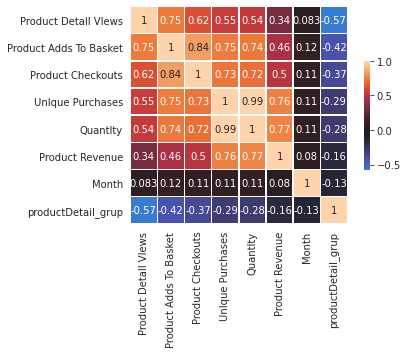

In [112]:
ax = sns.heatmap(SporAyakkabi.corr(),vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True) #Corr değerlerini kare içine yazdırmaya bakılacak (Annot=True)

In [113]:
dfDay=data.groupby('Day of Week Name').mean().reset_index()
dfDay

,Day of Week Name,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,FrIday,202.58,3.89,20.06,1.37,1.41,367.18,2.16,1.99
1,Monday,236.73,4.01,20.36,1.33,1.36,351.40,2.33,1.92
2,Saturday,218.05,3.87,19.79,1.29,1.32,341.03,2.21,1.96
3,Sunday,215.08,3.94,21.05,1.30,1.32,334.03,2.26,1.96
4,Thursday,212.97,4.03,22.30,1.37,1.40,352.06,2.08,1.98
5,Tuesday,217.45,3.91,20.54,1.39,1.46,379.94,2.32,1.98
6,Wednesday,229.43,4.28,24.08,1.41,1.51,346.22,2.07,1.97


In [0]:
#data2['TrueDate']=pd.to_datetime(data2['Date'], format='%Y%m%d', errors='ignore')      #Önce 2 üzerinde denedim sonra data da uyguladım

In [115]:
#data2["Month"] = data2["TrueDate"].apply(lambda x: datetime.strftime(x, "%m"))  # Datetime -> month
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356 entries, 0 to 13355
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    13356 non-null  datetime64[ns]
 1   Day of Week Name        13356 non-null  object        
 2   MaIn Category           13356 non-null  object        
 3   Sub Category            13325 non-null  object        
 4   Category                13299 non-null  object        
 5   Product                 13356 non-null  object        
 6   Product DetaIl VIews    13356 non-null  int64         
 7   Product Adds To Basket  13356 non-null  int64         
 8   Product Checkouts       13356 non-null  int64         
 9   UnIque Purchases        13356 non-null  int64         
 10  QuantIty                13356 non-null  int64         
 11  Product Revenue         13356 non-null  float64       
 12  Month                   13356 non-null  int64 

In [116]:
dfMonth=data.groupby('Month')
dfMonth.corr()

Product DetaIl VIews  ...  productDetail_grup
Month                                               ...                    
1     Product DetaIl VIews                    1.00  ...               -0.53
      Product Adds To Basket                  0.73  ...               -0.46
      Product Checkouts                       0.57  ...               -0.37
      UnIque Purchases                        0.54  ...               -0.29
      QuantIty                                0.45  ...               -0.23
      Product Revenue                         0.16  ...               -0.06
      productDetail_grup                     -0.53  ...                1.00
2     Product DetaIl VIews                    1.00  ...               -0.69
      Product Adds To Basket                  0.67  ...               -0.48
      Product Checkouts                       0.55  ...               -0.38
      UnIque Purchases                        0.45  ...               -0.30
      QuantIty                                0.22  ...               -0.13
      Product Revenue                         0.17  ...               -0.18
      productDetail_grup                     -0.69  ...                1.00
3     Product DetaIl VIews                    1.00  ...               -0.60
      Product Adds To Basket                  0.76  ...               -0.45
      Product Checkouts                       0.60  ...               -0.37
      UnIque Purchases                        0.55  ...               -0.29
      QuantIty                                0.48  ...               -0.25
      Product Revenue                         0.41  ...               -0.28
      productDetail_grup                     -0.60  ...                1.00

[21 rows x 7 columns]

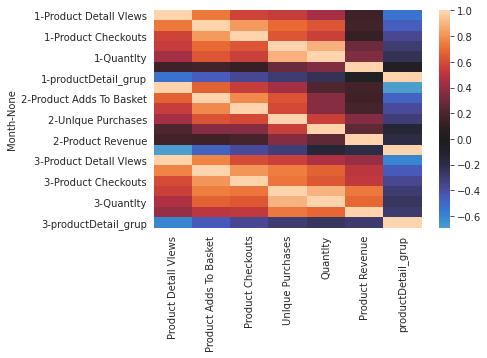

In [117]:
ax = sns.heatmap(dfMonth.corr(),vmax=1, center=0)

In [118]:
dfMonth.mean().reset_index()

,Month,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,productDetail_grup
0,1,195.77,3.55,20.65,1.27,1.32,361.21,2.06
1,2,184.55,3.37,16.63,1.24,1.29,333.01,1.99
2,3,256.61,4.67,24.78,1.48,1.52,364.21,1.90


In [119]:
dfMonth.sum().reset_index()

,Month,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,productDetail_grup
0,1,626657,11376,66093,4073,4221,1156244.88,6581
1,2,775278,14170,69862,5204,5432,1398958.54,8358
2,3,1527885,27831,147568,8827,9027,2168490.98,11292


In [120]:
dfDay

,Day of Week Name,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,FrIday,202.58,3.89,20.06,1.37,1.41,367.18,2.16,1.99
1,Monday,236.73,4.01,20.36,1.33,1.36,351.40,2.33,1.92
2,Saturday,218.05,3.87,19.79,1.29,1.32,341.03,2.21,1.96
3,Sunday,215.08,3.94,21.05,1.30,1.32,334.03,2.26,1.96
4,Thursday,212.97,4.03,22.30,1.37,1.40,352.06,2.08,1.98
5,Tuesday,217.45,3.91,20.54,1.39,1.46,379.94,2.32,1.98
6,Wednesday,229.43,4.28,24.08,1.41,1.51,346.22,2.07,1.97


In [121]:
dfPDG=data.groupby(['productDetail_grup','Month'])['Product Revenue'].sum().reset_index()
dfPDG

,productDetail_grup,Month,Product Revenue
0,1,1,336498.09
1,1,2,455117.06
2,1,3,1000342.97
3,2,1,500831.53
4,2,2,698386.78
5,2,3,864744.66
6,3,1,318915.26
7,3,2,245454.70
8,3,3,303403.35


In [0]:
import plotly.express as px

In [123]:
fig = px.scatter(dfPDG, x="productDetail_grup", y="Product Revenue", color='Month') # Çeşitlendirme plotly express https://plotly.com/python/plotly-express/
fig.show()

In [124]:
fig = px.scatter(dfPDG, x="productDetail_grup", y="Product Revenue",color='Month', marginal_y="violin")
fig

In [125]:
data

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,2020-01-01,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,1,3
1,2020-01-01,Wednesday,Bebek,GIyIm,ESofman TakImI,adIdas I Bball Jog Ft,18,1,10,1,1,173.00,1,3
2,2020-01-01,Wednesday,Cocuk,Aksesuar,SIrt CantasI,NIke Y Nk Brsla JdI MInI Bkpk,58,3,15,1,1,91.90,1,2
3,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,1,3
4,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade,62,2,6,1,1,70.90,3,2
13352,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Merc Fade-Fa19,40,3,7,2,2,169.80,3,2
13353,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,Futbol Topu,NIke Nk Skls,256,1,3,1,1,56.90,3,1
13354,2020-03-31,Tuesday,UnIsex,Spor MalzemelerI,PIlates,(not set),298,6,20,1,1,25.00,3,1


In [126]:
cleanData = data.iloc[:, lambda dataDen: [0,6,8,11,12,13]]
cleanData

,Date,Product DetaIl VIews,Product Checkouts,Product Revenue,Month,productDetail_grup
0,2020-01-01,15,5,181.00,1,3
1,2020-01-01,18,10,173.00,1,3
2,2020-01-01,58,15,91.90,1,2
3,2020-01-01,5,7,196.90,1,3
4,2020-01-01,48,34,182.90,1,2
...,...,...,...,...,...,...
13351,2020-03-31,62,6,70.90,3,2
13352,2020-03-31,40,7,169.80,3,2
13353,2020-03-31,256,3,56.90,3,1
13354,2020-03-31,298,20,25.00,3,1


In [127]:
for i in range (1,4): #3 Ayın ayrı ayrı Product Detail grouplarına göre renklendirilmiş grafiği

  monthi=cleanData[cleanData.Month==i]

  fig = px.parallel_coordinates(monthi,color='productDetail_grup',labels={"Product DetaIl VIews": "Detay Görüntüleme", "Product Checkout": "Checkout Adımına Geçme",
                  "Product Revenue": "Revenue"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
  fig.show()

In [128]:
dfPDG2=data.groupby('productDetail_grup')['QuantIty'].sum().reset_index()
dfPDG2

,productDetail_grup,QuantIty
0,1,7239
1,2,7699
2,3,3742


In [129]:
PR=data['Product Revenue']
PR

0       181.00
1       173.00
2        91.90
3       196.90
4       182.90
         ...  
13351    70.90
13352   169.80
13353    56.90
13354    25.00
13355    15.01
Name: Product Revenue, Length: 13356, dtype: float64

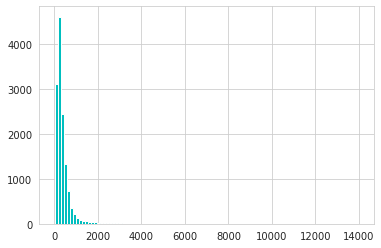

In [130]:
plt.hist(PR,bins=100, color = 'c')
pd.options.display.float_format='{:.2f}'.format # e leri atmak düzgün göstermek için yaptık

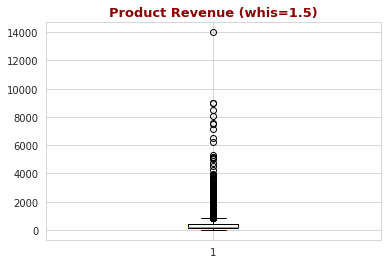

In [131]:
plt.boxplot(PR, ) # Revenue metriğimizde çok fazla yüksek değer var bunları arındırıp tekrar histograma çevireceğiz
plt.title("Product Revenue (whis=1.5)", fontdict=baslik_font)
plt.show()

In [132]:
from scipy.stats import zscore

z_scores = zscore(PR)
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Eşik değeri: 1
Aykırı değerlerin sayısı: 953
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 388
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 202
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 111
------


In [0]:
zPR=np.where(z_scores > 4)[0]

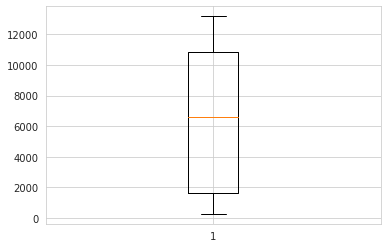

In [134]:
plt.boxplot(zPR) # z-score la elenmiş dataların gösterimi ( Ortalama ve aşırı değerler açısından güzel gözüküyor ama kanatlarda çok fazla birikme var gibi o yüzden histograma bakalım)
plt.show()

(array([37., 12., 11., 11., 40.]),
 array([  262. ,  2847.2,  5432.4,  8017.6, 10602.8, 13188. ]),
 <a list of 5 Patch objects>)

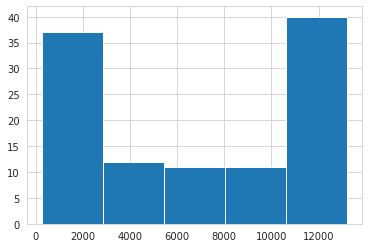

In [135]:
plt.hist(zPR,bins=5) # Product Revenue hala düzgün bir şekilde dağılmış olarak gözükmemekte

In [136]:
from scipy.stats.mstats import winsorize # Bir de winsorize etmeyi deneyeceğim

winsorize_pr = winsorize(PR, (0, 0.15))

winsorize_pr

masked_array(data=[181.  , 173.  ,  91.9 , ...,  56.9 ,  25.  ,  15.01],
             mask=False,
       fill_value=1e+20)

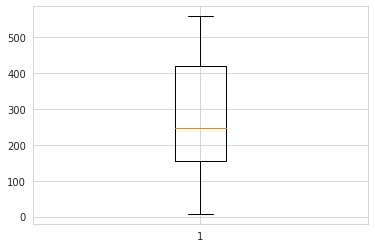

In [137]:
plt.boxplot(winsorize_pr) # Winsorize edip datanın max % 15 lik kısmını attığımda bile ortalama değerin üstündeki değerlerin ağırlık olarak fazla olduğunu gözlemliyorum
plt.show()

(array([ 724., 1259., 2068., 1908., 1726., 1132.,  968.,  502.,  732.,
        2337.]),
 array([  7.5 ,  62.65, 117.8 , 172.95, 228.1 , 283.25, 338.4 , 393.55,
        448.7 , 503.85, 559.  ]),
 <a list of 10 Patch objects>)

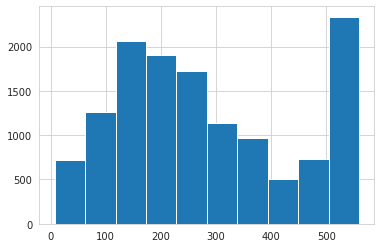

In [138]:
plt.hist(winsorize_pr,bins=10) # Normale çevirirken yüksek değerlerin baskınlığını yok etmek dataya çok zarar verecekti. 
#ve Product Revenue nün de bütün yapacağımız hesaplamalarda önemli bir metrik olması üzerine bu değerleri kaybetmek istemiyorum.

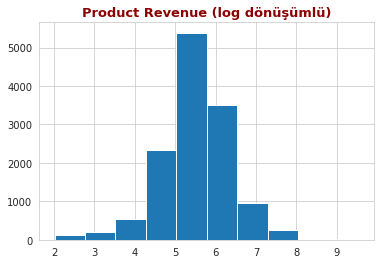

In [139]:
log_PR=np.log(PR)  # Burada Daha normale benzeyen bir dağılım gördük. O yüzden buradan devam edelim
plt.subplot(1,1,1) 
plt.hist(log_PR)
plt.title("Product Revenue (log dönüşümlü)", fontdict=baslik_font)
plt.show()

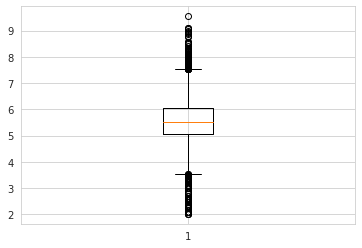

In [140]:
plt.boxplot(log_PR) # Bu sefer her iki kanatta da aşırı değerler var ?
plt.show()

In [141]:
log_PR

0       5.20
1       5.15
2       4.52
3       5.28
4       5.21
        ... 
13351   4.26
13352   5.13
13353   4.04
13354   3.22
13355   2.71
Name: Product Revenue, Length: 13356, dtype: float64

In [142]:
data.head()

,Date,Day of Week Name,MaIn Category,Sub Category,Category,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,2020-01-01,Wednesday,Bebek,AyakkabI,Spor AyakkabI,adIdas Fortarun MIckey Ac,15,2,5,1,1,181.00,1,3
1,2020-01-01,Wednesday,Bebek,GIyIm,ESofman TakImI,adIdas I Bball Jog Ft,18,1,10,1,1,173.00,1,3
2,2020-01-01,Wednesday,Cocuk,Aksesuar,SIrt CantasI,NIke Y Nk Brsla JdI MInI Bkpk,58,3,15,1,1,91.90,1,2
3,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Flex ExperIence Rn 8 Psv,5,1,7,1,1,196.90,1,3
4,2020-01-01,Wednesday,Cocuk,AyakkabI,Spor AyakkabI,NIke Jr Vapor 13 Club Mds Fg-Mg,48,4,34,1,1,182.90,1,2


In [143]:
dfProduct=data.groupby('Product').sum().reset_index()
dfProduct

,Product,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,(not set),5690,150,844,79,88,6009.77,154,157
1,Arena B Dynamo Jr BrIef,15,3,10,1,1,50.00,1,3
2,Arena B ScrIbe Jr BrIef,18,3,19,2,2,179.80,5,6
3,Arena B SolId Short Jr,51,5,32,2,2,259.80,3,6
4,Arena Bubble 3 Jr,6,1,4,1,1,69.90,1,3
...,...,...,...,...,...,...,...,...,...
2888,İgor W20121 Bunny,337,10,77,7,7,524.30,14,17
2889,İgor W20122 Sylvester,28,3,17,1,1,74.90,2,3
2890,İgor W20123 Snoopy PrInt,400,17,106,8,8,479.20,15,13
2891,İgor W80302 ComIcs,14,2,8,1,1,89.90,3,3


In [144]:
ProductFlow = dfProduct.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedProductFlow=ProductFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedProductFlow=SortedProductFlow.head(20).reset_index()
SortedProductFlow

,index,Product,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,2582,adIdas Runfalcon,136262,7122,271,63741.10
1,2025,Vans Old Skool,39228,3776,138,62370.90
2,895,NIke Star Runner 2 (Psv),85170,6994,334,54519.56
3,2375,adIdas Hoops 2.0,45413,2523,160,39836.90
4,2081,Vans Ua Old Skool,81948,2611,130,39288.90
5,2658,adIdas Superstar J,29285,2446,94,35498.10
6,2178,adIdas ArchIvo,48583,2926,153,33435.60
7,851,NIke PIco 5 (Tdv),99790,7042,274,33167.68
8,2254,adIdas Crazychaos,22828,1134,87,30933.40
9,2070,Vans Ua Comfycush Old Skool,17058,1280,66,28311.50


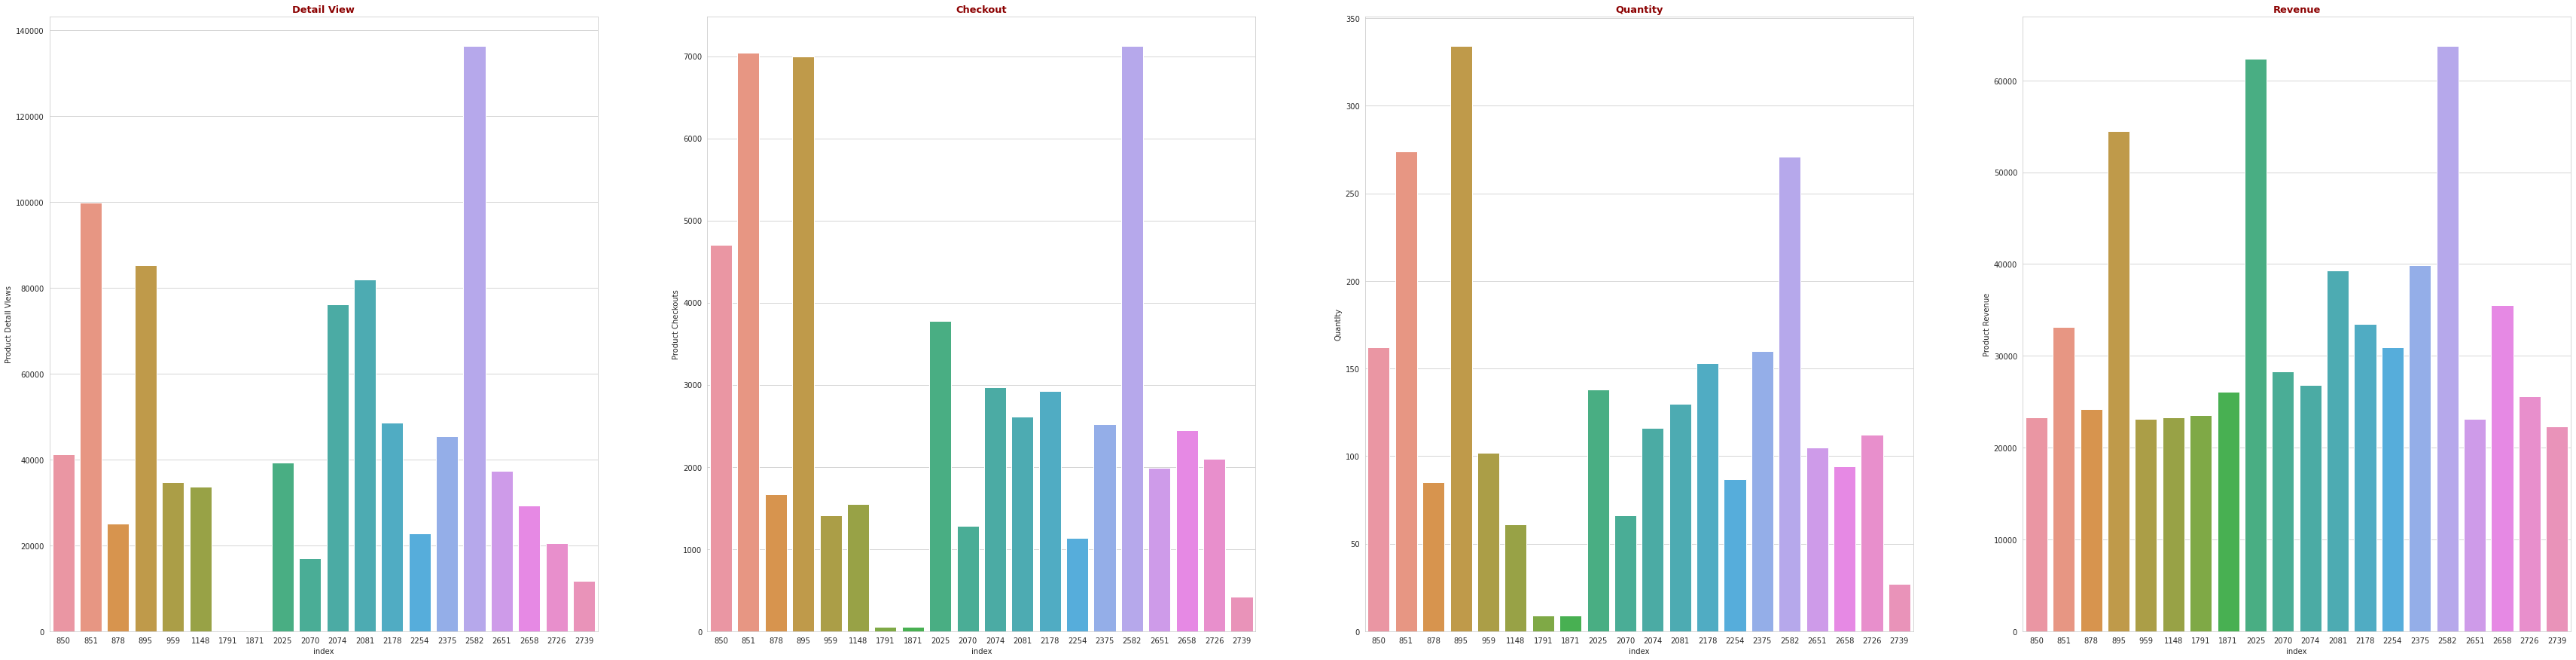

In [145]:
plt.figure(figsize=(60,15)) # Burada her ürün için bir histogram çizdirdim revenue ye göre çok fazla ürün olduğu için her adım için ayrıca da histogram çizdirdik.
# En çok gelir getiren ve diğer adımlarda da yüksek pay alan ürün, 2582 : adIdas Runfalcon	olmuştur. Yine fazla gelir getirmesine rağmen fazla ürün detay görüntülemesi almayan ürün olarak ise 2025 : Vans Old Skool olmuştur.
#Bu ürünün kullanıcılar tarafından satın alım oranının yüksek olduğu sonucunu alabiliyoruz. Buradan da kullanıcıların bu ürünü alma konusunda niyetinin yüksek olduğunu görüyoruz.
# 851 : NIke PIco 5 (Tdv) adlı ürün ise yüksek ürün detay görüntülenmesi almasına rağmen gelir konusunda yüksekler arasında yer almamaktadır. Buradanda bu ürünün ürün detay sayfasında bir dezavantaj olabilir.


plt.subplot(1,4,1)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedProductFlow['index'], SortedProductFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

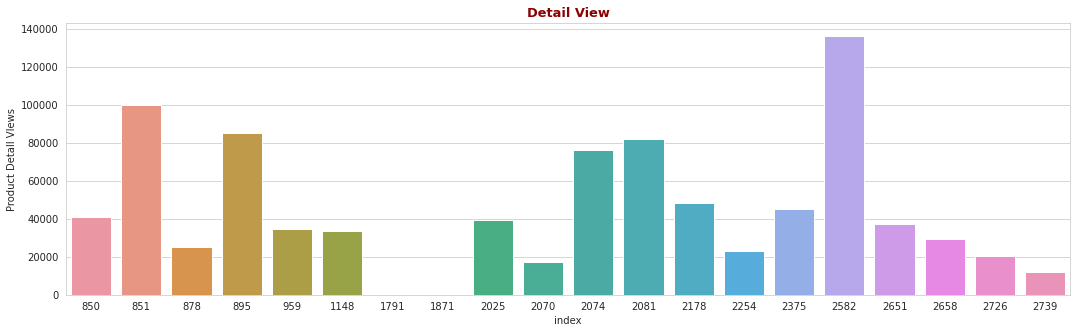

In [146]:
plt.figure(figsize=(18,5)) 

plt.subplot(1,1,1)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.show()

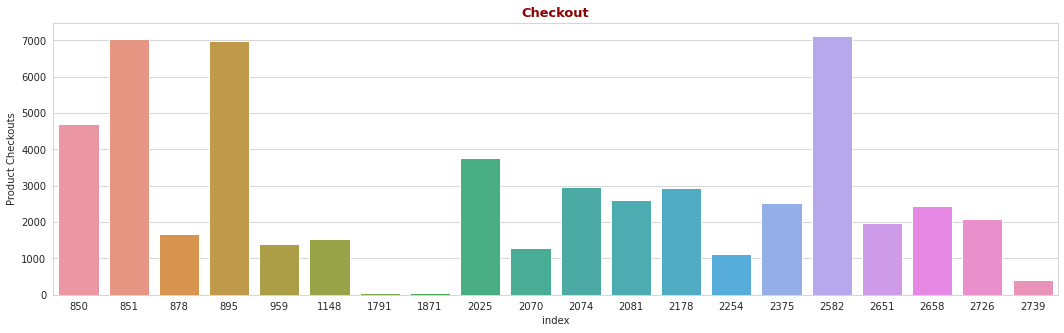

In [147]:
plt.figure(figsize=(18,5)) 

plt.subplot(1,1,1)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.show()

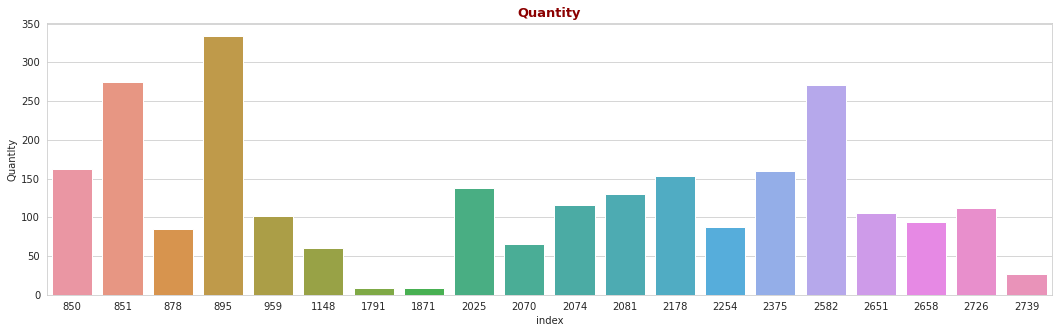

In [148]:
plt.figure(figsize=(18,5)) 

plt.subplot(1,1,1)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.show()

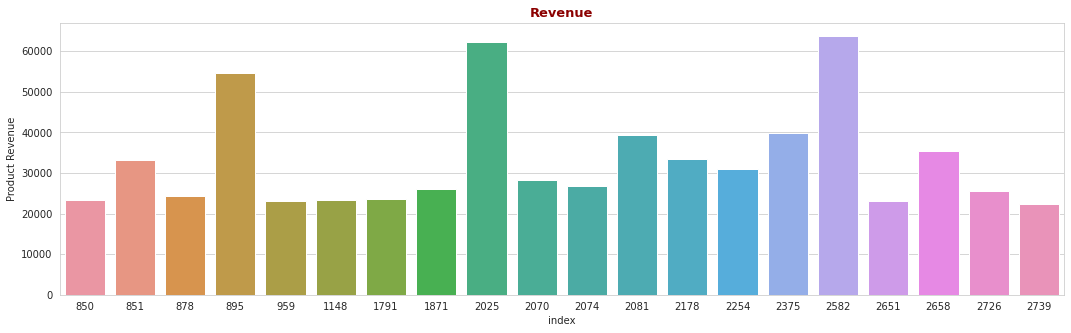

In [149]:
plt.figure(figsize=(18,5)) # En çok gelir getiren ürünler 2582,2025,895

plt.subplot(1,1,1)
sns.barplot(SortedProductFlow['index'], SortedProductFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)

plt.show()

Yaptığım çizimlere göre ürünlerin elde edilen gelirlerde fazla ürün detay görüntülenmesine sahip olmayan ürünlerin kullanıcı davranışlarına göre siteye önyargılı bir şekilde, fazla incelenmeden yüksek ihtimalle satın alınan ürünleri ayrıca yarattığım bir oran'la analiz etmeye çalıştım. Aşağıda Rev/Det Rate olarak inceledim

In [150]:
SortedProductFlow

,index,Product,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,2582,adIdas Runfalcon,136262,7122,271,63741.10
1,2025,Vans Old Skool,39228,3776,138,62370.90
2,895,NIke Star Runner 2 (Psv),85170,6994,334,54519.56
3,2375,adIdas Hoops 2.0,45413,2523,160,39836.90
4,2081,Vans Ua Old Skool,81948,2611,130,39288.90
5,2658,adIdas Superstar J,29285,2446,94,35498.10
6,2178,adIdas ArchIvo,48583,2926,153,33435.60
7,851,NIke PIco 5 (Tdv),99790,7042,274,33167.68
8,2254,adIdas Crazychaos,22828,1134,87,30933.40
9,2070,Vans Ua Comfycush Old Skool,17058,1280,66,28311.50


In [151]:
fig = px.parallel_coordinates(SortedProductFlow,color='Product Revenue',labels={"Product DetaIl VIews": "Detay Görüntüleme", "Product Checkouts": "Checkout Adımına Geçme",
                  "Product Revenue": "Revenue"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [152]:
ProductFlow = dfProduct.iloc[:, lambda dataDen: [0,1,3,5,6]]  
SortedProductFlow=ProductFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedProductFlowRate=SortedProductFlow.head(30).reset_index()
SortedProductFlowRate['Rev/Det Rate']=SortedProductFlowRate['Product Revenue']/SortedProductFlowRate['Product DetaIl VIews']
SortedProductFlowRate=SortedProductFlowRate.sort_values(by=['Rev/Det Rate'],ascending=False)
SortedProductFlowRate=SortedProductFlowRate.head(15).reset_index()
SortedProductFlowRate

,level_0,index,Product,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue,Rev/Det Rate
0,11,1871,The North Face W Suzanne TrIclImate Jacket,140,53,9,26091.00,186.36
1,14,1791,The North Face M Mcmurdo Parka,146,50,9,23511.60,161.04
2,22,120,ColumbIa Wk0260 Delta RIdge™ Down Hooded Jacket,1142,187,16,20079.39,17.58
3,28,93,ColumbIa Carson Pass II Jacket,1542,132,10,17269.63,11.20
4,25,111,ColumbIa Murr Peak™ II Jacket,1845,128,12,18499.37,10.03
5,24,2601,adIdas Samoa Lea Spor AyakkabI,4063,665,45,18950.10,4.66
6,29,2776,adIdas W XplorIc Parka,6635,444,25,17260.00,2.60
7,19,2739,adIdas W Cw NuvIc Jkt,11742,419,27,22304.00,1.90
8,9,2070,Vans Ua Comfycush Old Skool,17058,1280,66,28311.50,1.66
9,1,2025,Vans Old Skool,39228,3776,138,62370.90,1.59


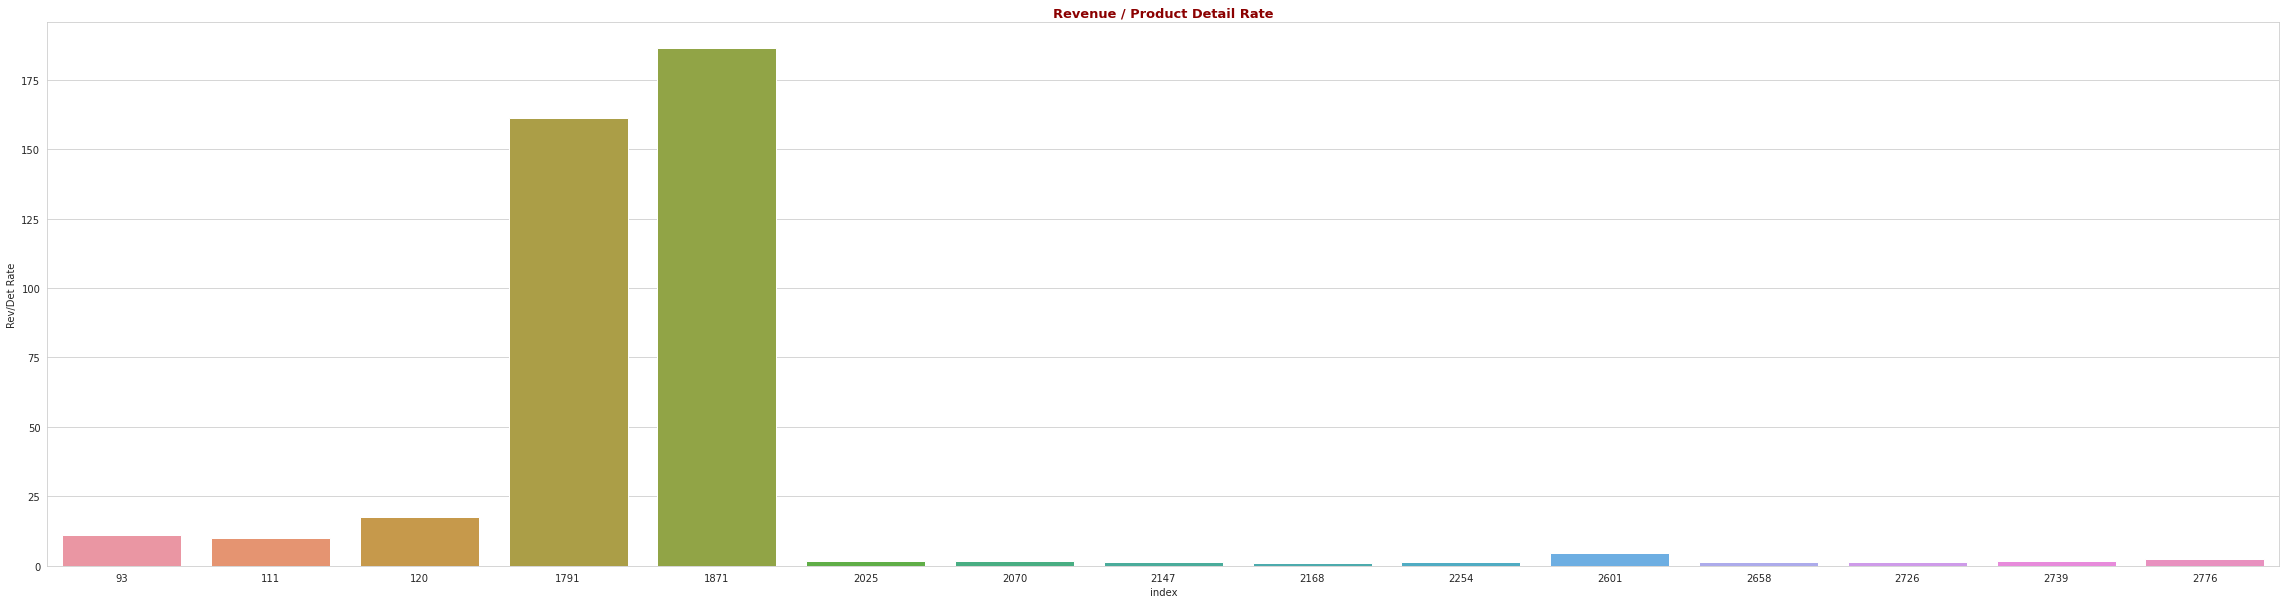

In [153]:
plt.figure(figsize=(40,10)) 

plt.subplot(1,1,1)
sns.barplot(SortedProductFlowRate['index'], SortedProductFlowRate['Rev/Det Rate'])
plt.title("Revenue / Product Detail Rate", fontdict = baslik_font)

plt.show()

In [179]:
fig = px.parallel_coordinates(SortedProductFlowRate,color='Rev/Det Rate',labels={"Product DetaIl VIews": "Detay Görüntüleme", "Product Checkouts": "Checkout Adımına Geçme",
                  "Product Revenue": "Revenue"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [154]:
dfMainCat=data.groupby('MaIn Category').sum().reset_index()
dfMainCat

,MaIn Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,Bebek,365338,7082,32086,1628,1647,261201.10,2349,1703
1,Cocuk,605491,13555,71695,4039,4120,756781.74,6069,5323
2,Erkek,860376,14647,84705,5999,6219,1973277.78,10343,9355
3,KadIn,651190,10742,58192,3932,3971,1270615.77,6938,6447
4,UnIsex,447425,7351,36845,2506,2723,461818.01,3766,3403


In [155]:
dfMCatvsPDet=data.groupby('MaIn Category')['Product DetaIl VIews'].sum().reset_index()
dfMCatvsPDet

,MaIn Category,Product DetaIl VIews
0,Bebek,365338
1,Cocuk,605491
2,Erkek,860376
3,KadIn,651190
4,UnIsex,447425


In [156]:
dfMCatvsPChe=data.groupby('MaIn Category')['Product Checkouts'].sum().reset_index()
dfMCatvsPChe

,MaIn Category,Product Checkouts
0,Bebek,32086
1,Cocuk,71695
2,Erkek,84705
3,KadIn,58192
4,UnIsex,36845


In [157]:
dfMCatvsQ=data.groupby('MaIn Category')['QuantIty'].sum().reset_index()
dfMCatvsQ

,MaIn Category,QuantIty
0,Bebek,1647
1,Cocuk,4120
2,Erkek,6219
3,KadIn,3971
4,UnIsex,2723


In [158]:
dfMCatvsRev=data.groupby('MaIn Category')['Product Revenue'].sum().reset_index()
dfMCatvsRev

,MaIn Category,Product Revenue
0,Bebek,261201.10
1,Cocuk,756781.74
2,Erkek,1973277.78
3,KadIn,1270615.77
4,UnIsex,461818.01


In [159]:
dfMCatvsRev['Product Revenue'].max()

1973277.7799999826

In [160]:
MainCategoryFlow = dfMainCat.iloc[:, lambda dataDen: [0,1,3,5,6]]
MainCategoryFlow

,MaIn Category,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,Bebek,365338,32086,1647,261201.10
1,Cocuk,605491,71695,4120,756781.74
2,Erkek,860376,84705,6219,1973277.78
3,KadIn,651190,58192,3971,1270615.77
4,UnIsex,447425,36845,2723,461818.01


In [161]:
dfSubCat=data.groupby('Sub Category').sum().reset_index()
dfSubCat

,Sub Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,AgIrlIklar,28,1,6,1,1,654.99,2,3
1,Aksesuar,105461,3750,18883,1438,1767,126852.72,2120,2316
2,AyakkabI,2445906,39829,202418,12073,12205,3282053.84,18923,14526
3,GIyIm,342985,8620,56511,4069,4142,1263891.84,7366,8240
4,KondIsyon AletlerI,297,13,31,1,1,38.01,3,1
5,Spor AksesuarlarI,3595,59,241,22,24,2778.43,38,37
6,Spor MalzemelerI,30118,1042,4928,462,501,40018.04,935,1023
7,SweatshIrt,24,1,32,1,1,132.99,3,3


In [162]:
SubCategoryFlow = dfSubCat.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedSubCategoryFlow=SubCategoryFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedSubCategoryFlow

,Sub Category,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
2,AyakkabI,2445906,202418,12205,3282053.84
3,GIyIm,342985,56511,4142,1263891.84
1,Aksesuar,105461,18883,1767,126852.72
6,Spor MalzemelerI,30118,4928,501,40018.04
5,Spor AksesuarlarI,3595,241,24,2778.43
0,AgIrlIklar,28,6,1,654.99
7,SweatshIrt,24,32,1,132.99
4,KondIsyon AletlerI,297,31,1,38.01


In [163]:
dfCat=data.groupby('Category').sum().reset_index()
dfCat

,Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,AgIrlIk EldIvenI,372,30,226,27,28,2811.40,59,79
1,"AtkI, Bere Ve EldIven",653,24,212,23,23,2168.40,35,59
2,Atlama İpI,192,10,26,5,6,325.80,15,12
3,AyakkabI BakIm ÜrUnlerI,204,16,78,10,10,314.00,22,22
4,BUstIyer,6549,163,1050,76,76,11106.15,143,130
5,Babet,184,6,18,3,3,327.00,8,6
6,BagcIk,7370,292,2066,140,280,5363.10,186,165
7,Basketbol Sortu,1134,57,336,26,26,3988.96,53,65
8,Basketbol Topu,1774,113,589,66,68,7127.00,156,175
9,Bone,314,32,332,22,22,544.71,34,60


In [164]:
CategoryFlow = dfCat.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedCategoryFlow=CategoryFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedCategoryFlow

,Category,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
39,Spor AyakkabI,2383124,192043,11417,3171233.93
30,Mont,94728,7125,568,525630.46
16,ESofman AltI,81189,11805,835,180139.69
13,Ceket,36768,5187,413,162388.45
43,T-ShIrt,25306,11754,820,89642.72
34,SIrt CantasI,62325,7159,548,75971.80
44,Tayt,29064,6681,393,68864.82
42,SweatshIrt,9480,2838,254,63514.94
17,ESofman TakImI,33045,3502,246,58677.83
10,Bot Ve CIzme,16676,2099,188,53208.63


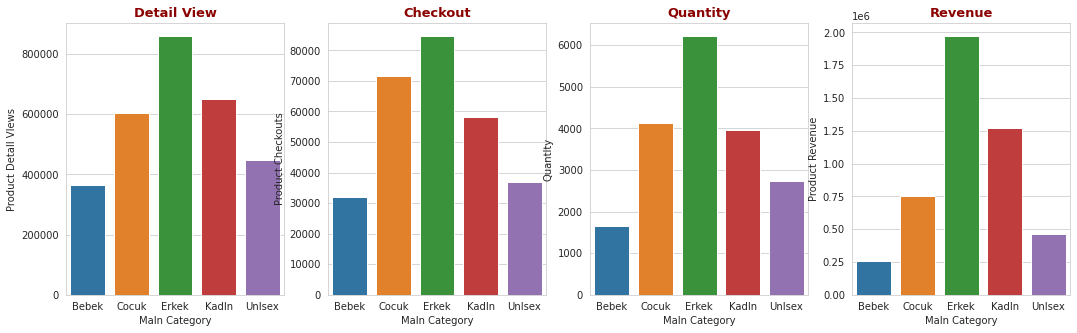

In [165]:
plt.figure(figsize=(18,5)) # Burada Her kategorinin kazananları analizi gibi bi gösterim hedefledim, Erkek ürünleri önde 

plt.subplot(1,4,1)
sns.barplot(MainCategoryFlow['MaIn Category'], MainCategoryFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(MainCategoryFlow['MaIn Category'], MainCategoryFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(MainCategoryFlow['MaIn Category'], MainCategoryFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(MainCategoryFlow['MaIn Category'], MainCategoryFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

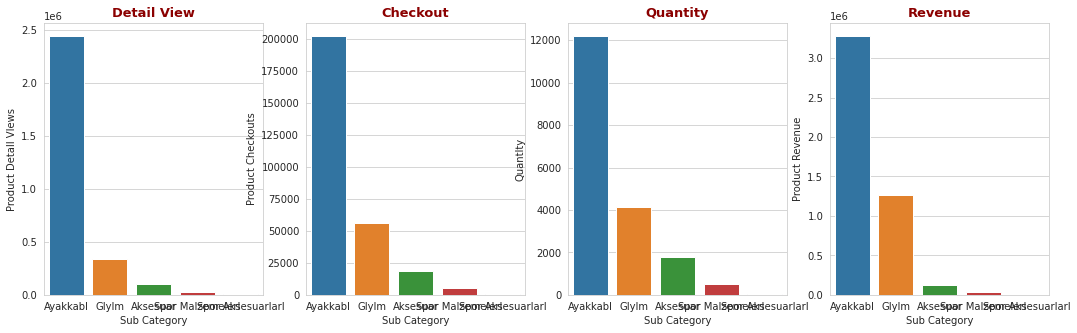

In [166]:
plt.figure(figsize=(18,5)) # Burada Her kategorinin kazananları analizi gibi bi gösterim hedefledim, Ayakkabı kazanan 

plt.subplot(1,4,1)
sns.barplot(SortedSubCategoryFlow['Sub Category'].head(), SortedSubCategoryFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedSubCategoryFlow['Sub Category'].head(), SortedSubCategoryFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedSubCategoryFlow['Sub Category'].head(), SortedSubCategoryFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedSubCategoryFlow['Sub Category'].head(), SortedSubCategoryFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

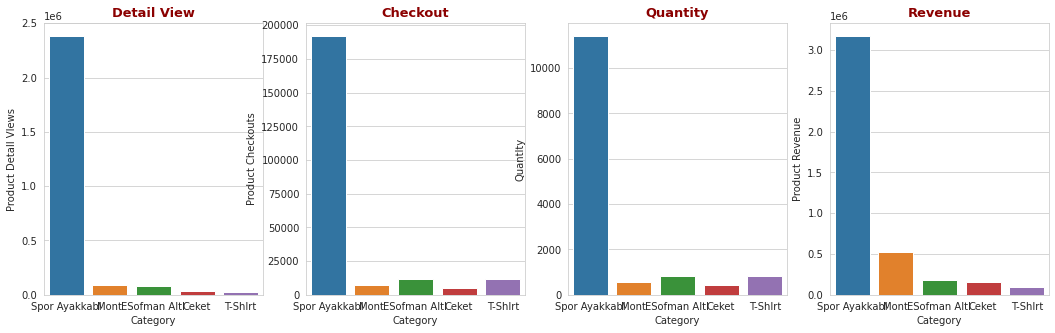

In [167]:
plt.figure(figsize=(18,5)) # Burada Her kategorinin kazananları analizi gibi bi gösterim hedefledim, Spor Ayakkabı Kazanan

plt.subplot(1,4,1)
sns.barplot(SortedCategoryFlow['Category'].head(), SortedCategoryFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedCategoryFlow['Category'].head(), SortedCategoryFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedCategoryFlow['Category'].head(), SortedCategoryFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedCategoryFlow['Category'].head(), SortedCategoryFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

In [168]:
erkekData=data.loc[data['MaIn Category']=='Erkek']
dfErkekSubCat=erkekData.groupby('Sub Category').sum().reset_index()
dfErkekSubCat

,Sub Category,Product DetaIl VIews,Product Adds To Basket,Product Checkouts,UnIque Purchases,QuantIty,Product Revenue,Month,productDetail_grup
0,Aksesuar,1066,86,582,46,184,8438.48,91,119
1,AyakkabI,693802,10375,56454,3769,3803,1282896.19,6217,4783
2,GIyIm,161151,3999,26765,2076,2123,669568.83,3836,4211
3,Spor MalzemelerI,3820,165,774,92,93,8006.80,178,216


In [169]:
ErkekSubCategoryFlow = dfErkekSubCat.iloc[:, lambda dataDen: [0,1,3,5,6]]
ErkekSubCategoryFlow

,Sub Category,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,Aksesuar,1066,582,184,8438.48
1,AyakkabI,693802,56454,3803,1282896.19
2,GIyIm,161151,26765,2123,669568.83
3,Spor MalzemelerI,3820,774,93,8006.80


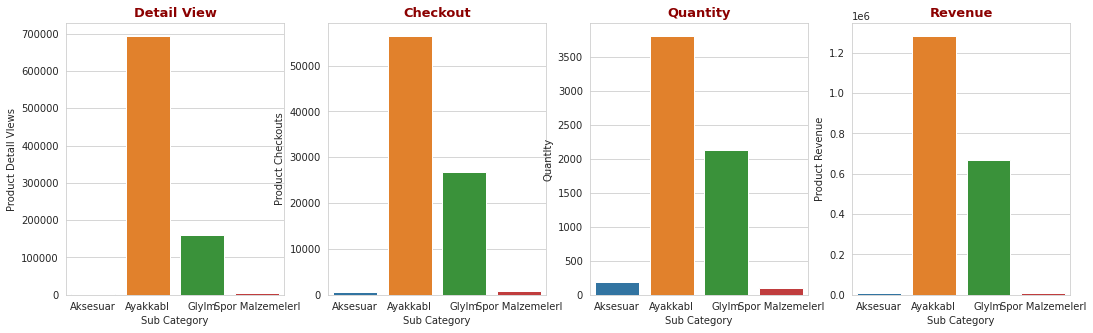

In [170]:
plt.figure(figsize=(18,5)) # Burada Erkek ürünleri arasında kazanan sub category i inceledim, kazanan Ayakkabı ama giyim de yine yüksek

plt.subplot(1,4,1)
sns.barplot(ErkekSubCategoryFlow['Sub Category'].head(), ErkekSubCategoryFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(ErkekSubCategoryFlow['Sub Category'].head(), ErkekSubCategoryFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(ErkekSubCategoryFlow['Sub Category'].head(), ErkekSubCategoryFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(ErkekSubCategoryFlow['Sub Category'].head(), ErkekSubCategoryFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

In [171]:
erkekData=data.loc[data['MaIn Category']=='Erkek']
dfErkekCat=erkekData.groupby('Category').sum().reset_index()
ErkekCategoryFlow = dfErkekCat.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedErkekCategoryFlow=ErkekCategoryFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedErkekCategoryFlow.head()

,Category,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
24,Spor AyakkabI,686593,55581,3706,1266051.83
19,Mont,27946,2485,231,259934.70
10,ESofman AltI,59920,7589,551,116792.60
8,Ceket,28055,3321,273,111229.19
26,T-ShIrt,18624,7244,550,62041.18


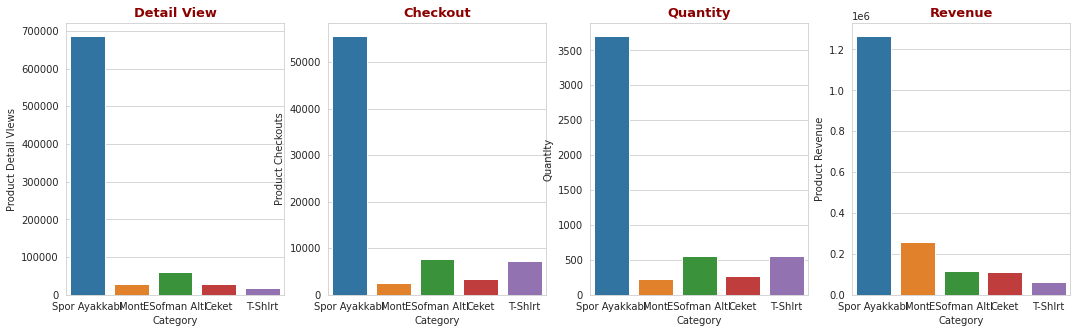

In [172]:
plt.figure(figsize=(18,5)) # Burada Erkek ürünleri arasında kazanan category i inceledim, kazanan Spor Ayakkabı çıktı ama mantıklı bi analiz olmadı o yüzden hangi ürünler olduğunu çıkaracağım

plt.subplot(1,4,1)
sns.barplot(SortedErkekCategoryFlow['Category'].head(), SortedErkekCategoryFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedErkekCategoryFlow['Category'].head(), SortedErkekCategoryFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedErkekCategoryFlow['Category'].head(), SortedErkekCategoryFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedErkekCategoryFlow['Category'].head(), SortedErkekCategoryFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

In [173]:
erkekAyakkabiData=erkekData.loc[data['Category']=='Spor AyakkabI']
dfErkekAyakkabiProduct=erkekAyakkabiData.groupby('Product').sum().reset_index()
ErkekProductFlow = dfErkekAyakkabiProduct.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedErkekProductFlow=ErkekProductFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedErkekProductFlow=SortedErkekProductFlow.head(10).reset_index()
SortedErkekProductFlow

,index,Product,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,433,adIdas Runfalcon,44752,3060,104,27407.00
1,465,adIdas Vs Pace,20511,2098,112,25575.00
2,178,NIke RevolutIon 5,25102,1671,85,24230.97
3,195,NIke Vapor 13 Club Tf,34691,1411,102,23136.10
4,435,adIdas Samoa Lea Spor AyakkabI,4063,665,45,18950.10
5,397,adIdas Hoops 2.0,23274,1273,77,18684.70
6,106,NIke AIr HeIghts,13437,649,41,16348.08
7,150,NIke Legend EssentIal,11850,1228,54,15868.71
8,461,adIdas V Racer 2.0,11669,829,59,15422.20
9,372,adIdas ArchIvo,19838,1315,58,13984.50


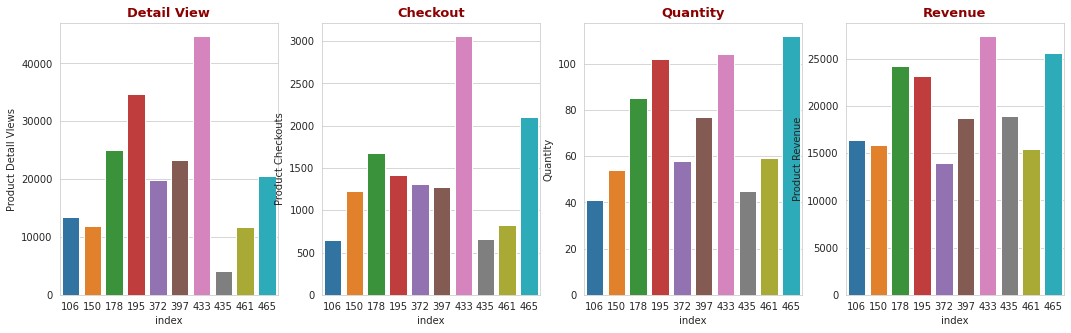

In [185]:
plt.figure(figsize=(18,5)) # Burada her ürün ismi tabloyu çok karıştırdı o yüzden indexlerini kullandım, Erkek Spor Ayakkabıların En baskını 433(pembe) ve 465(Turkuaz) Yani adidas Runfalcon ve adidas Vs Pace,
#adidas Vs Pace ürün detay incelemesi düşük olmasına rağmen revenue ve satın alım miktarı yüksek olarak rapora yansımıştır. 435 (Gri) olan adIdas Samoa Lea Spor AyakkabI ise yine çok düşük bir ürün detaya rağmen yüksek gelir getirmiş

plt.subplot(1,4,1)
sns.barplot(SortedErkekProductFlow['index'], SortedErkekProductFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedErkekProductFlow['index'], SortedErkekProductFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedErkekProductFlow['index'], SortedErkekProductFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedErkekProductFlow['index'], SortedErkekProductFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

In [183]:
fig = px.parallel_coordinates(SortedErkekProductFlow,color='index',labels={"Product DetaIl VIews": "Detay Görüntüleme", "Product Checkouts": "Checkout Adımına Geçme",
                  "Product Revenue": "Revenue"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [175]:
erkekGiyimData=erkekData.loc[data['Sub Category']=='GIyIm']
dfErkekGiyimProduct=erkekGiyimData.groupby('Product').sum().reset_index()
ErkekGiyimFlow = dfErkekGiyimProduct.iloc[:, lambda dataDen: [0,1,3,5,6]]
SortedErkekGiyimFlow=ErkekGiyimFlow.sort_values(by=['Product Revenue'],ascending=False)
SortedErkekGiyimFlow=SortedErkekGiyimFlow.head(10).reset_index()
SortedErkekGiyimFlow

,index,Product,Product DetaIl VIews,Product Checkouts,QuantIty,Product Revenue
0,365,The North Face M Mcmurdo Parka,146,50,9,23511.60
1,19,ColumbIa Murr Peak™ II Jacket,1845,128,12,18499.37
2,576,adIdas Parka Padde,4102,197,22,16148.00
3,26,ColumbIa Wo1151 Powder LIte™ Hooded Jacket,737,178,12,16064.61
4,362,The North Face M L5 Jkt,68,48,4,15836.00
5,616,adIdas VarIlIte Jacket,5029,435,28,15424.00
6,27,ColumbIa Wo1273 Bugaboo™ II Fleece Interchange...,96,39,6,12479.94
7,625,adIdas XplorIc Parka,3311,237,16,11542.00
8,374,The North Face M PurIst Jkt,12,13,3,10737.00
9,366,The North Face M Mountn Lgt TrI Jkt,35,31,5,10595.00


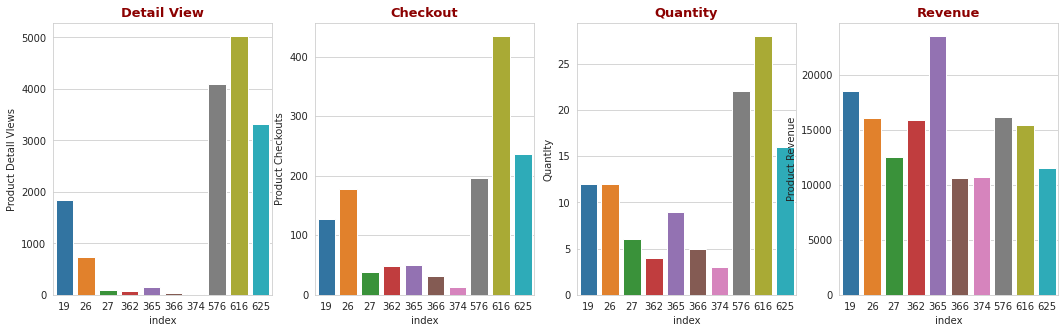

In [186]:
plt.figure(figsize=(18,5)) # Burada her ürün ismi tabloyu çok karıştırdı o yüzden indexlerini kullandım, Erkek Giyim Ürünlerinin En başarılı gelir getireni 365 (Mor) Yani The North Face M Mcmurdo Parka ama diğer detayları düşük,
#576 ve 616 olan ürünler yüksek görüntüleme , checkout ve satın alma miktarı almış ama getirdiği gelir düşük bunun sebebide düşük fiyatlı olması (Ürünler 576 : adIdas Parka Padde	ve 616 : adIdas VarIlIte Jacket) .
#

plt.subplot(1,4,1)
sns.barplot(SortedErkekGiyimFlow['index'], SortedErkekGiyimFlow['Product DetaIl VIews'])
plt.title("Detail View", fontdict = baslik_font)

plt.subplot(1,4,2)
sns.barplot(SortedErkekGiyimFlow['index'], SortedErkekGiyimFlow['Product Checkouts'])
plt.title("Checkout", fontdict = baslik_font)

plt.subplot(1,4,3)

sns.barplot(SortedErkekGiyimFlow['index'], SortedErkekGiyimFlow['QuantIty'])
plt.title("Quantity", fontdict = baslik_font)

plt.subplot(1,4,4)

sns.barplot(SortedErkekGiyimFlow['index'], SortedErkekGiyimFlow['Product Revenue'])
plt.title("Revenue", fontdict = baslik_font)


plt.show()

In [182]:
fig = px.parallel_coordinates(SortedErkekGiyimFlow,color='index',labels={"Product DetaIl VIews": "Detay Görüntüleme", "Product Checkouts": "Checkout Adımına Geçme",
                  "Product Revenue": "Revenue"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

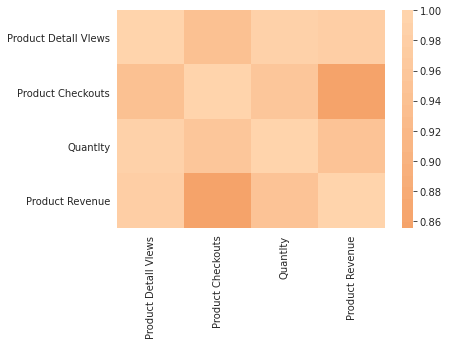

In [177]:
dene1 = sns.heatmap(MainCategoryFlow.corr(),vmax=1, center=0) # Sum ile correlasyonun heatmap i işler mi dedim. Beğenmedim

In [178]:
fig = px.density_heatmap(MainCategoryFlow, x="MaIn Category", y="Product Revenue") # Bu Heatmap nası göstericek diye denemek istedim onu da beğenmedim
fig.show()

Bu çalışmada elimizde bulunana veride belirli ürünlerin kategorileri, ürün detay görüntülenmeleri, sepete eklenmeleri, satın alım adımlarına geçişleri ve satım alım miktarları, getirdikleri gelirlere göre gerçekleşen olayların tarihleri de göz önüne alınarak yansıtılmıştır.

  Yaptığımız çalışmada en çok gelir getiren ürünlerin nasıl özellikleri olduğunu ve yine elde edilen gelirlerin diğer adımlarla olan ilişkileri incelenmiştir.

  Yapılan çalışmada öncelikle veri setindeki boş değerleri inceledik. Çıkan sonuçlarda data da boş kolon olduğu tespitinden sonra onu çıkardık.

  Öncelikle ürün detay görüntülemelerine göre gruplama yaptık ve bu metriğin ortalaması ve %75 ine göre gruplamalarımıza 1,2,3 değerlerini atadık.

  Sonrasında haftanın Günleri ve Aylara göre gruplamalarla kazanan gün ve Ayları bulduk

  Ek olarak, Revenue üzerinde istatistik çalışmaları yaparak fazlalık değerleri atmalımıyız sorusuna cevap aradık, fakat revenue metriğinin en önemli sonuç metriği olduğu için bu analizlerde log dağılımını göz önüne alarak ürünlerin elde ettirdikleri gelir bilgilerini veri kümesinden çıkarmama kararı aldık

  Elimizde veriye göre, baktığımızda web sitesinde kullanıcıların bir ürünü satın alması için belirli tarihlerde öncelikle ürünün detay sayfasını görüntülemesi sonrasında ürünü sepete eklemesi sonra da bu ürününü checkout adımına taşıması ve satın alma işlemini tamamlayıp quantity ve product revenue metriklerini beslemesi gerekmektedir. Fakat bu adımlarda ürünlerin sepete eklenmesindeki düşük rakamlar veri setinde bir hata olduğu izlenimi yaratmıştır ve yapılan analizlerde bu adım göz önüne alınmamıştır.

  Son olarak kategorilerine göre ürünlerin elde edilen gelire göre sıralamalarını inceledik. Burada kazanan main category yi ayrıca ürün dağılımlarına göre inceledik.